# <center>TP1</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

***

## *Data Cleaning and Preparation*

In [2]:
df = pd.read_csv("/Users/mac/Desktop/tpdata/Automobile_data.csv", na_values="?") #replacing missing data with nan
df.dropna(inplace=True) #removing the rows that contains nan values

In [3]:
df.isnull().values.any() #Check If Any Value is nan

False

In [4]:
df=df[["highway-mpg", "engine-size", "horsepower", "curb-weight","price"]]


In [5]:
df.head(4)

,highway-mpg,engine-size,horsepower,curb-weight,price
3,30,109,102.0,2337,13950.0
4,22,136,115.0,2824,17450.0
6,25,136,110.0,2844,17710.0
8,20,131,140.0,3086,23875.0


***

## *Data standardization*

In [6]:
df=(df-df.mean())/df.std()

In [7]:
df.head(4)

,highway-mpg,engine-size,horsepower,curb-weight,price
3,-0.322294,-0.335724,0.200645,-0.257580,0.426052
4,-1.560840,0.550661,0.623841,0.752917,1.021507
6,-1.096385,0.550661,0.461073,0.794415,1.065741
8,-1.870477,0.386516,1.437681,1.296551,2.114592


***

 ## *Data visualisation*

array([[<AxesSubplot:xlabel='highway-mpg', ylabel='highway-mpg'>,
        <AxesSubplot:xlabel='engine-size', ylabel='highway-mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='highway-mpg'>,
        <AxesSubplot:xlabel='curb-weight', ylabel='highway-mpg'>,
        <AxesSubplot:xlabel='price', ylabel='highway-mpg'>],
       [<AxesSubplot:xlabel='highway-mpg', ylabel='engine-size'>,
        <AxesSubplot:xlabel='engine-size', ylabel='engine-size'>,
        <AxesSubplot:xlabel='horsepower', ylabel='engine-size'>,
        <AxesSubplot:xlabel='curb-weight', ylabel='engine-size'>,
        <AxesSubplot:xlabel='price', ylabel='engine-size'>],
       [<AxesSubplot:xlabel='highway-mpg', ylabel='horsepower'>,
        <AxesSubplot:xlabel='engine-size', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>,
        <AxesSubplot:xlabel='curb-weight', ylabel='horsepower'>,
        <AxesSubplot:xlabel='price', ylabel='horsepower'>],
       [<AxesSubplot:xlabel='high

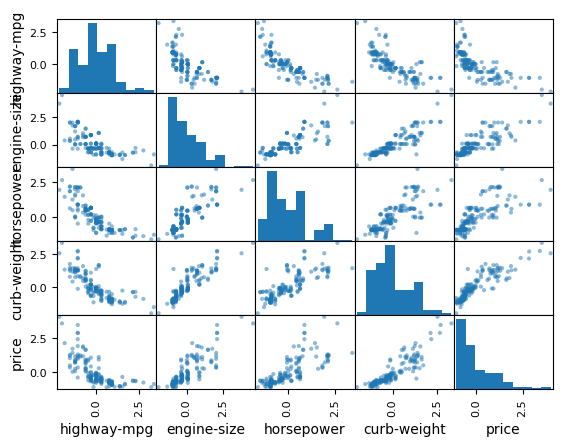

In [8]:
pd.plotting.scatter_matrix(df)

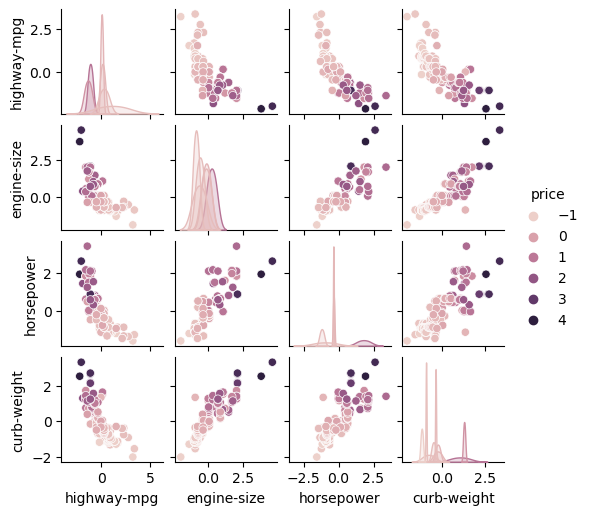

In [9]:
sns.pairplot(df, hue ='price',height=1.3)

***

## *Correlation matrix*

In [10]:
matrix_correl=df.corr()

In [11]:
matrix_correl.head(5)


,highway-mpg,engine-size,horsepower,curb-weight,price
highway-mpg,1.000000,-0.714095,-0.827941,-0.789338,-0.720090
engine-size,-0.714095,1.000000,0.812073,0.888626,0.841496
horsepower,-0.827941,0.812073,1.000000,0.790095,0.759874
curb-weight,-0.789338,0.888626,0.790095,1.000000,0.893639
price,-0.720090,0.841496,0.759874,0.893639,1.000000


In [12]:
df.shape

(159, 5)

### Plotting the correlation matrix
<a id="corr_matrix"><a>

Text(0.5, 1.0, 'Correlation matrix')

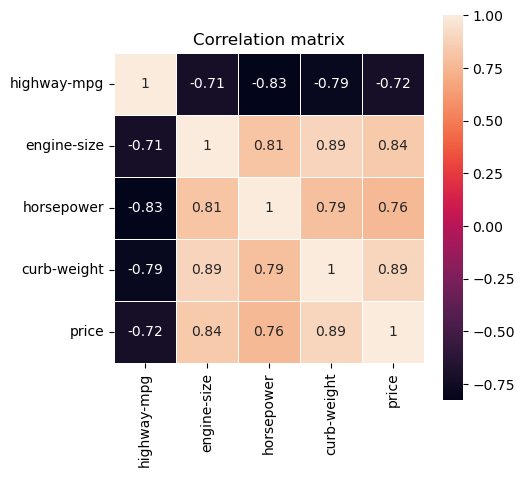

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(matrix_correl, vmax=1,square=True,annot=True,linewidth=.5)
plt.title('Correlation matrix') 

In [14]:
e_val,e_vect = np.linalg.eig(matrix_correl)

### Eigenvalues (valeurs propres)

In [16]:
print(e_val)
e_val.shape

[4.21746687 0.37041395 0.20187102 0.07443664 0.13581151]


(5,)

### Eigenvectors(vecteurs propres)

In [17]:
print(e_vect)
e_vect.shape

[[ 0.42841038 -0.67210808  0.46687658  0.29430474  0.24524734]
 [-0.45214217 -0.34194267  0.47090558 -0.44793074 -0.50621009]
 [-0.44384998  0.41560073  0.60435367  0.27252607  0.43676013]
 [-0.46330161 -0.26886809 -0.26681004  0.73983904 -0.30742832]
 [-0.44763916 -0.43166182 -0.35191368 -0.30184518  0.63113668]]


(5, 5)

### principal components

In [18]:
pc1 = matrix_correl @ e_vect[:,0]
pc2 = matrix_correl @ e_vect[:,1]

In [19]:
print(pc1)
pc1.shape

highway-mpg    1.806807
engine-size   -1.906895
horsepower    -1.871923
curb-weight   -1.953959
price         -1.887903
dtype: float64


(5,)

In [20]:
pc2

highway-mpg   -0.248958
engine-size   -0.126660
horsepower     0.153944
curb-weight   -0.099592
price         -0.159894
dtype: float64


***


##### *Note: install mlxtend module command:pip install mlxtend and restart Kernel*


In [22]:
from mlxtend.plotting import plot_pca_correlation_graph

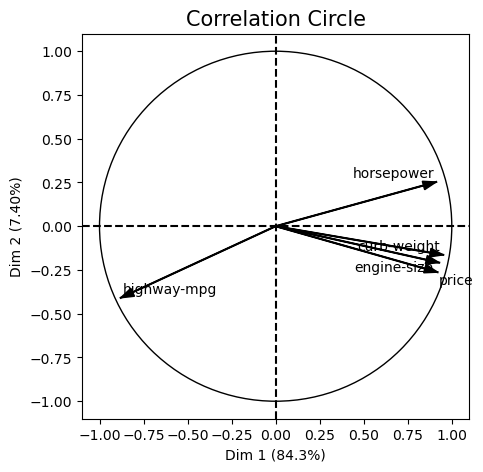

In [33]:

for i in range(matrix_correl.shape[1]):
    feature_names[i] =  matrix_correl.columns[i]
    

figure, correlation_matrix = plot_pca_correlation_graph(df, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=5)


 Note: <li>Features with a positive correlation will be grouped together</li><li>Features with a negative correlation will be plotted on the opposing quadrants of this plot.</li> 
 [(see correlations in the correlation matrix)](#corr_matrix)